# Modeling

- This modeling is performed on a telecom company's dataset provided by Sony Research as part of their data science positions' recruitment process
- More information on this task can be found on https://platform.stratascratch.com/data-projects/customer-churn-prediction

- Key points concerning the dataset
1. Dataset is imbalanced
2. Few outliers are present
3. Multicollinearity observed between certain variables

- We can use tree based algortihms such as Random Forest or XGBoost since they are robust at handling outliers, multicollinearity, feature selection and doesn't necessarily require feature scaling. However, we have already performed feature selection through EDA.
- With trees we don't have to encode any categorical variables.

In [34]:
import pandas as pd
import numpy as np
import sklearn
import xgboost
import matplotlib.pyplot as plt
import joblib

In [13]:
df = pd.read_csv('../data/processed/Data_Science_Challenge.csv')

In [14]:
X = df.drop(['churn'], axis = 1)
y = df[['churn']]

In [15]:
X = df[['international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day charge',
       'total eve minutes', 'total eve charge',
       'total night minutes', 'total night charge',
       'total intl minutes', 'total intl charge',
       'customer service calls']]

In [16]:
print(X)
print(y)



     international plan voice mail plan  number vmail messages  \
0                    no             yes                     25   
1                    no             yes                     26   
2                    no              no                      0   
3                   yes              no                      0   
4                   yes              no                      0   
...                 ...             ...                    ...   
3328                 no             yes                     36   
3329                 no              no                      0   
3330                 no              no                      0   
3331                yes              no                      0   
3332                 no             yes                     25   

      total day minutes  total day charge  total eve minutes  \
0                 265.1             45.07              197.4   
1                 161.6             27.47              195.5   
2              

In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   international plan      3333 non-null   object 
 1   voice mail plan         3333 non-null   object 
 2   number vmail messages   3333 non-null   int64  
 3   total day minutes       3333 non-null   float64
 4   total day charge        3333 non-null   float64
 5   total eve minutes       3333 non-null   float64
 6   total eve charge        3333 non-null   float64
 7   total night minutes     3333 non-null   float64
 8   total night charge      3333 non-null   float64
 9   total intl minutes      3333 non-null   float64
 10  total intl charge       3333 non-null   float64
 11  customer service calls  3333 non-null   int64  
dtypes: float64(8), int64(2), object(2)
memory usage: 312.6+ KB


In [18]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   churn   3333 non-null   bool 
dtypes: bool(1)
memory usage: 3.4 KB


In [19]:
cols = ['international plan', 'voice mail plan']
for col in cols:
    X[col] = X[col].astype('category')

C:\Users\kbrah\AppData\Local\Temp\ipykernel_34156\2791297942.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype('category')
C:\Users\kbrah\AppData\Local\Temp\ipykernel_34156\2791297942.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype('category')


In [ ]:
# Using train test split from sklearn
from sklearn.model_selection import train_test_split
# Adding the stratify parameter so proportion of imbalanced data is maintained in the splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99, stratify=y) 


In [ ]:
from xgboost import XGBClassifier
classifier = XGBClassifier(
    # Using scale_pos_weight to balance the classes by adjusting weights for imbalanced datasets
    scale_pos_weight = len(y_train[y_train==0]) / len(y_train[y_train==1]),
    random_state = 99,
    # using logloss for binary classification as it penalises incorrect predictions
    eval_metric = 'logloss',
    # Setting enable_categorical to encode the variables
    enable_categorical = True
)

In [22]:

classifier.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=99, ...)

In [ ]:
y_pred = classifier.predict(X_test)
# Extracting probabilities of churning as True
y_pred_prob = classifier.predict_proba(X_test)[:, 1]

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       False       0.95      0.98      0.97       570
        True       0.86      0.71      0.78        97

    accuracy                           0.94       667
   macro avg       0.91      0.85      0.87       667
weighted avg       0.94      0.94      0.94       667



1. From the metrics we can see that under support the number of instances between True and False are truely imbalanced with 570 False and 97 True
2. Precision is the proportion of correctly predicted positive observations to the total predicted positive outcomes and is relatively high with 95% and 86% for False and True respectively.
3. Recall is the proportion of correctly predicted positive observations to the actual positive observations, it is high for False cases (98%) but relatively low for True (71%) - we can perform hyperparameter tuning to boost this metric.
4. F1 score is the harmonic mean of precision and recall - and high precision and recall gives a high score.

ROC-AUC Score: 0.89


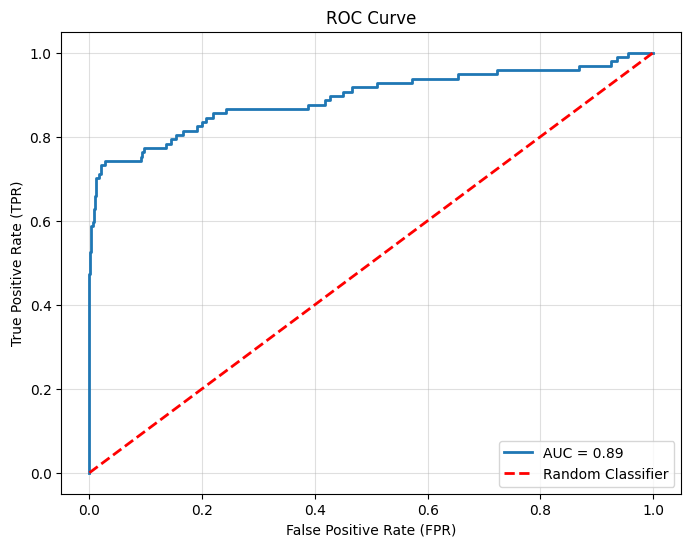

In [31]:
from sklearn.metrics import roc_auc_score, roc_curve
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC Score: {roc_auc:.2f}")

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", linewidth=2)
plt.plot([0, 1], [0, 1], 'r--', label="Random Classifier", linewidth=2)  # Reference line for random guessing
plt.title("ROC Curve")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc="lower right")
plt.grid(alpha=0.4)
plt.show()


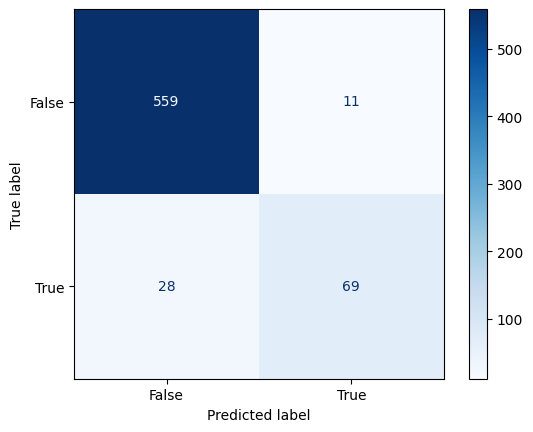

In [29]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, cmap="Blues")


## Performing hyperparameter tuning

In [ ]:
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, f1_score

param_grid = {
    'learning_rate' : uniform(0.01, 0.3),
    'max_depth' : range(3,10),
    'n_estimators': [50, 100, 200, 300],
    'scale_pos_weight': np.linspace(1, len(y_train[y_train==0]) / len(y_train[y_train==1]),15),
    'gamma' : uniform(0,5)
}

classifier_2 = XGBClassifier(eval_metric='logloss', enable_categorical=True, random_state=99)

# Scoring based on F1 score for label as True
scorer = make_scorer(f1_score, pos_label=True)

# Using RandomizedSearchCV as its better at optimising than GridSearchCV
random_search = RandomizedSearchCV(
    estimator = classifier_2,
    param_distributions= param_grid,
    n_iter = 50,
    scoring = scorer,
    cv = 3,
    verbose = 2,
    random_state = 99,
    n_jobs = -1
)



In [36]:
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=True,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_...
                   param_distributions={'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001B148B245C0>,
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001B15F58B4A0>,
                                        'max_depth': range(3, 10),
                                        'n_estimators': [50, 100, 200, 300],
                                        'scale_pos_weight': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])},
                   random_state=99,
                   scoring=make_scorer(f1_score, response_method='predict', pos_label=True),
                   verbose=2)

In [37]:
print("Best Parameters:", random_search.best_params_)
print("Best F1 Score:", random_search.best_score_)

Best Parameters: {'gamma': np.float64(0.18284696329849193), 'learning_rate': np.float64(0.24876577010724565), 'max_depth': 7, 'n_estimators': 200, 'scale_pos_weight': np.float64(1.0)}
Best F1 Score: 0.7531078904991949


In [ ]:
# Saving the best model
best_model = random_search.best_estimator_
y_pred_2 = best_model.predict(X_test)
print(classification_report(y_test, y_pred_2))

              precision    recall  f1-score   support

       False       0.95      0.99      0.97       570
        True       0.89      0.70      0.79        97

    accuracy                           0.94       667
   macro avg       0.92      0.84      0.88       667
weighted avg       0.94      0.94      0.94       667



In [54]:
joblib.dump(best_model, '../models/best_model.pkl')

['../models/best_model.pkl']

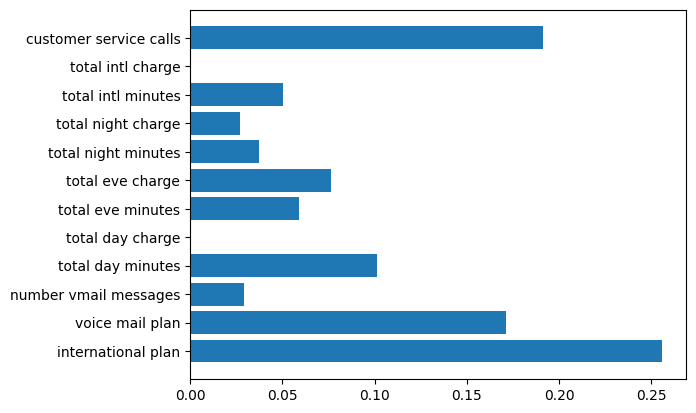

In [ ]:
#Plotting feature importance
feature_importances = best_model.feature_importances_
feature_names = X_train.columns
plt.barh(feature_names, feature_importances)
plt.show()


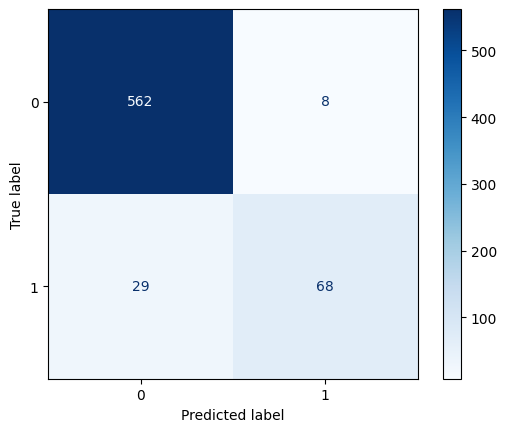

In [47]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_2)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_).plot(cmap='Blues')

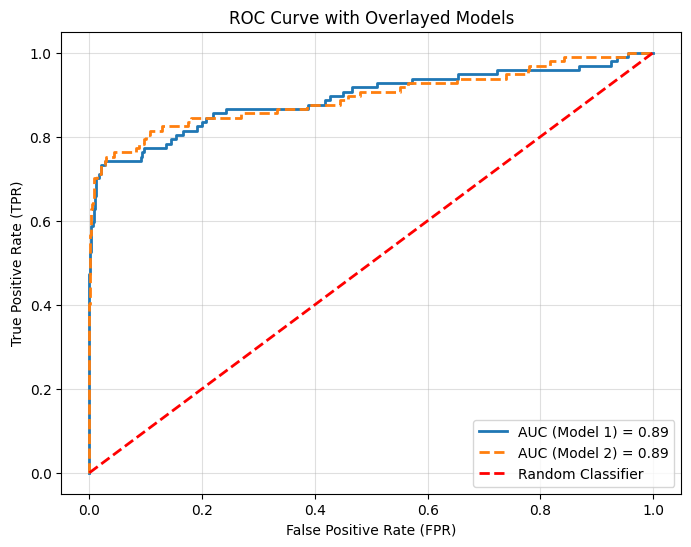

In [ ]:
# Compute ROC curve and AUC for the second model
y_pred_prob_2 = best_model.predict_proba(X_test)[:, 1]
fpr_2, tpr_2, thresholds_2 = roc_curve(y_test, y_pred_prob_2)
roc_auc_2 = roc_auc_score(y_test, y_pred_prob_2)

# Plot both ROC curves
plt.figure(figsize=(8, 6))

# First model ROC curve
plt.plot(fpr, tpr, label=f"AUC (Model 1) = {roc_auc:.2f}", linewidth=2)

# Second model ROC curve
plt.plot(fpr_2, tpr_2, label=f"AUC (Model 2) = {roc_auc_2:.2f}", linewidth=2, linestyle='--')

# Reference line for random guessing
plt.plot([0, 1], [0, 1], 'r--', label="Random Classifier", linewidth=2)

# Add plot details
plt.title("ROC Curve with Overlayed Models")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc="lower right")
plt.grid(alpha=0.4)

# Display the plot
plt.show()


In [53]:
# Saving X_test and y_test to use in the app
X = df.drop(['churn'], axis = 1)
y = df[['churn']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99, stratify=y)
joblib.dump(X_test, '../data/processed/X_test.pkl')
joblib.dump(y_test, '../data/processed/y_test.pkl')

test_data = pd.concat([X_test, y_test], axis=1)
test_data.to_csv('../data/processed/test_data.csv', index=False)

- We proceed to app.py to create a data app using streamlit

##### Made by Khabeer Ahmed

- [GitHub](https://github.com/KhabeerAhmed/sony_customerchurn)
- [LinkedIn](https://www.linkedin.com/in/khabeerahmed/)